## Algoritmo de Euclides para máximo común divisor

In [2]:
def Euclides(a,b):
    A=max(a,b)
    B=min(a,b)
    r=A%B
    sequence=[(A,B,r)]
    while sequence[-1][2]!=0:
        C=sequence[-1]
        sequence=sequence+[(C[1],C[2],C[1]%C[2])]
    return sequence,sequence[-1][1]
    
    

In [156]:
Euclides(5749857983765,29898090345151)

([(29898090345151, 5749857983765, 1148800426326),
  (5749857983765, 1148800426326, 5855852135),
  (1148800426326, 5855852135, 1053407866),
  (5855852135, 1053407866, 588812805),
  (1053407866, 588812805, 464595061),
  (588812805, 464595061, 124217744),
  (464595061, 124217744, 91941829),
  (124217744, 91941829, 32275915),
  (91941829, 32275915, 27389999),
  (32275915, 27389999, 4885916),
  (27389999, 4885916, 2960419),
  (4885916, 2960419, 1925497),
  (2960419, 1925497, 1034922),
  (1925497, 1034922, 890575),
  (1034922, 890575, 144347),
  (890575, 144347, 24493),
  (144347, 24493, 21882),
  (24493, 21882, 2611),
  (21882, 2611, 994),
  (2611, 994, 623),
  (994, 623, 371),
  (623, 371, 252),
  (371, 252, 119),
  (252, 119, 14),
  (119, 14, 7),
  (14, 7, 0)],
 7)

## mcd

In [3]:
def mcd(a,b):
    return Euclides(a,b)[1]

In [4]:
mcd(904509,1630948)

1

In [5]:
import math

In [6]:
6/math.pi**2

0.6079271018540267

In [7]:
import numpy as np

In [8]:
def experiment(N,M):
    counter=0
    for i in range(N):
        a=np.random.choice(range(M))
        b=np.random.choice(range(M))
        if mcd(a,b)==1:
            counter=counter+1
    return counter/N

In [12]:
experiment(1000,84098)

0.609

In [132]:
Euclides(3248998,5466)[0]

[(3248998, 5466, 2194),
 (5466, 2194, 1078),
 (2194, 1078, 38),
 (1078, 38, 14),
 (38, 14, 10),
 (14, 10, 4),
 (10, 4, 2),
 (4, 2, 0)]

In [97]:
4//3

1

## Find linear combination

In [3]:
def findlinearcombination(A,B):
    #Here is is necessary that A>=B
    sequence=Euclides(A,B)[0]
    N=len(sequence)
    a=[x[0] for x in sequence]
    b=[x[1] for x in sequence]
    q=[a[i]//b[i] for i in range(N)]
    r=[x[2] for x in sequence]
    x=[1,-q[1]]
    y=[-q[0],1+q[0]*q[1]]
    for i in range(2,N-1):
        newx=x[i-2]-q[i]*x[i-1]
        newy=y[i-2]-y[i-1]*q[i]
        x.append(newx)
        y.append(newy)
    return x[-1],y[-1]
    

In [9]:
findlinearcombination(2335,23451)

(971, -9752)

In [20]:
a=495345
b=34535

In [21]:
mcd(a,b)

5

In [22]:
x,y=findlinearcombination(a,b)

In [23]:
x

1710

In [24]:
y

-24527

In [25]:
x*a+y*b

5

In [152]:
A=39485034859
B=953023549
S=findlinearcombination(A,B)
S[0]*A+S[1]*B-mcd(A,B)

0

In [105]:
sol=findlinearcombination(39895,450906)

In [108]:
[ sol[3][i]-sol[0][i]+sol[2][i]*sol[1][i] for i in range(len(sol[1]))]

[0, 0, 0, 0, 0, 0]

## La función phi de Euler

In [26]:
def phi(n):
    ans=0
    for i in range(1,n):
        if mcd(n,i)==1:
            ans=ans+1
    return ans

## Elementos invertibles

In [29]:
def invertibles(m):
    ans=[]
    for i in range(1,m):
        if mcd(m,i)==1:
            ans=ans+[i]
    return ans

In [31]:
invertibles(164)

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163]

In [72]:
a=3453
len(invertibles(a))-phi(a)

0

## Check if a number is prime


In [33]:
def isprime(n):
    ans="Yes"
    for i in range(2,n):
        if n%i==0:
            ans="No"
            break
    return ans

## Test Euler's theorem

In [34]:
N=3564

In [35]:
group=invertibles(N)

In [37]:
phi(N)

1080

In [38]:
len(group)

1080

In [39]:
size=phi(N)
eulertry=[(x**size)%N for x in group]

In [40]:
print(eulertry)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## Find primitive roots

In [42]:
def isprimitiveroot(a,m):
    if mcd(a,m)!=1:
        print(f"{a} is not relatively prime with {m}")
    else:
        ans="Yes"
        for i in range(1,phi(m)):
            if (a**i)%m==1:
                ans="No"
                break
        return ans

In [44]:
isprimitiveroot(5,6)

'Yes'

In [45]:
def findprimitiveroots(m):
    group=invertibles(m)
    ans=[]
    for number in group:
        if isprimitiveroot(number,m)=="Yes":
            ans.append(number)
    return ans

In [49]:
findprimitiveroots(8)

[]

In [50]:
def findfirstprimitiveroot(P):
    ans=f"{P} has no primitive roots because it is not prime"
    for i in range(1,P):
        if isprimitiveroot(i,P)=="Yes":
            ans=i
            break
    return ans

In [51]:
findfirstprimitiveroot(101)

2

## Diffie-Hellman protocol

In [52]:
def findprimelargerthan(m):
    size=m
    while True:
        if isprime(size)=="Yes":
            ans=size
            break
        else:
            size=size+1
    return ans

In [53]:
P=findprimelargerthan(30000)

In [54]:
P

30011

In [55]:
isprime(P)

'Yes'

In [58]:
g=findfirstprimitiveroot(P)

In [59]:
g

2

In [57]:
a=193
b=9834

In [61]:
A=(g**a)%P
B=(g**b)%P

In [62]:
A

28592

In [63]:
B

7514

In [66]:
SA=(B**a)%P

In [67]:
SB=(A**b)%P

In [68]:
SA

3768

In [70]:
SB

3768

## Plot Basel problem

In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [107]:

# Generate random data for the heatmap
N=2000
data = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if mcd(i+1,j+1)==1:
            data[i][j]=1





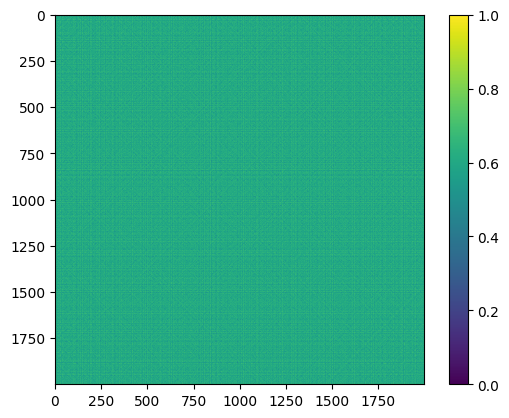

In [108]:
fig, ax = plt.subplots()

# Create heatmap
cax = ax.imshow(data)

# Create colorbar
cbar = fig.colorbar(cax)

plt.show()


## Fibonacci


In [2]:
def fib(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    else: 
        return fib(n-2)+fib(n-1)

In [6]:
def fastfib(n):
    ans=[0,1]
    for i in range(n-1):
        ans.append(ans[-1]+ans[-2])
    return ans[-1]

In [7]:
fastfib(100)

354224848179261915075